# NLP:SENTIMENTAL ANALYSIS

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from jupiterthemes import jtplot
#jtploy.style(theme = 'monokai', context = notebook, ticks = False, grid = flase)

In [2]:
#Importing the twitter dataset
tweets_df = pd.read_csv('/Users/visha/OneDrive/Desktop/Data analysis- Python/NLP_sentimental_analysis/archive/train.csv')
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#Copy of the dataset
tweets_df_orig = tweets_df

In [4]:
#Gaining insight about the dataset
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
# Gaining statistical info about the dataset
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [6]:
#Dropping the column using .drop()
tweets_df = tweets_df.drop(['id'], axis = 1)
tweets_df

#tweets_df = tweets_df[['labels, 'tweet']
#tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


## Exploratory Data Analysis

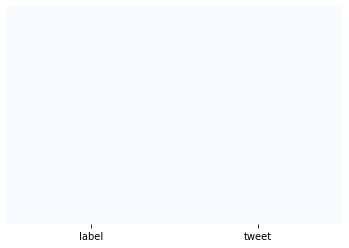

In [7]:
#Verifying if any null data through heatmap
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002622387DF48>]],
      dtype=object)

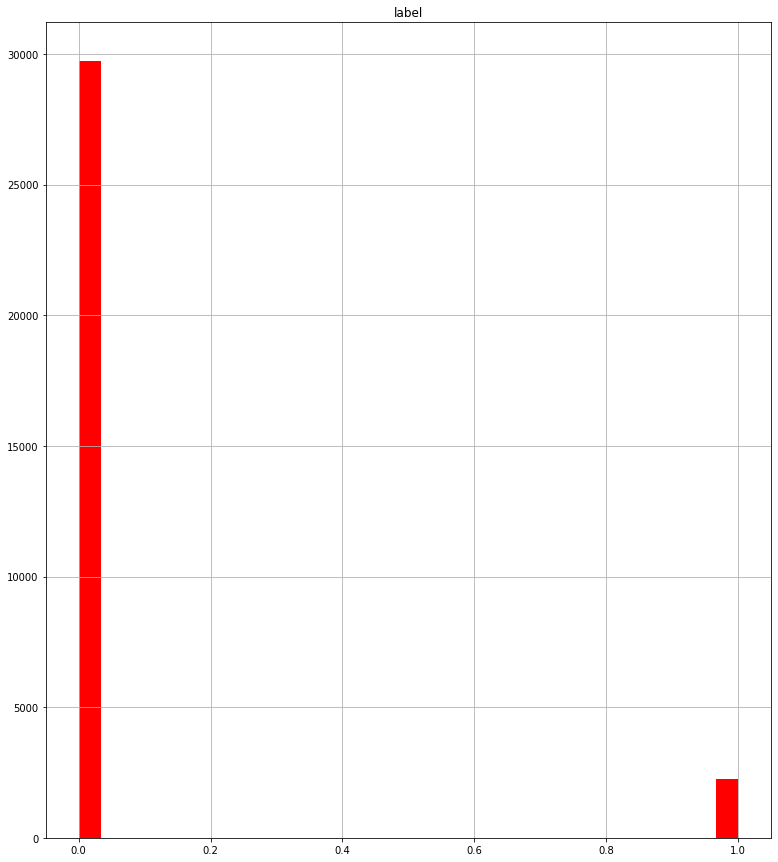

In [8]:
#Plotting a histogram for the label data
tweets_df.hist(bins = 30, figsize = (13,15), color = 'r')

#sns.countpot(x = tweets_df['label'], color = 'r')

In [9]:
# Calculating and adding the length of tweets to the dataframe
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


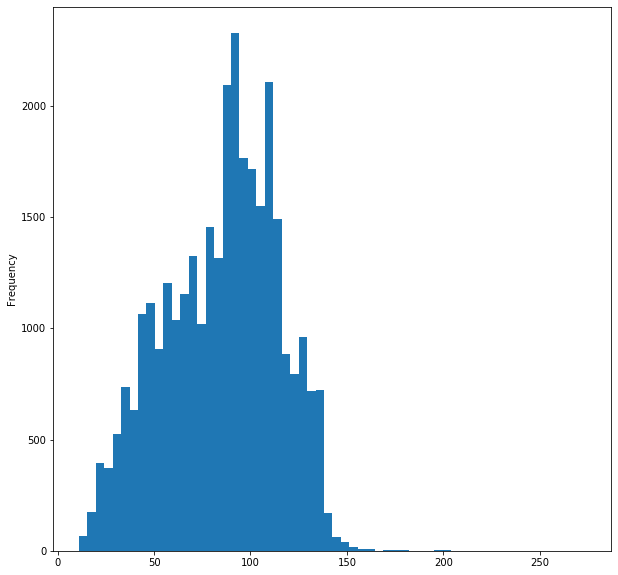

In [10]:
#Plotting a histogram for the length data
tweets_df['length'].plot(bins=60, figsize=(10,10), kind = 'hist')

In [11]:
#Gaining statistical info about the data using .describe()
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [12]:
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

'i love you '

In [13]:
tweets_df[tweets_df['length']==84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [14]:
#creating two new dataframes using label data
pos = tweets_df[tweets_df['label']==0]
neg = tweets_df[tweets_df['label']==1]

In [15]:
pos

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [16]:
neg

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [17]:
pos.shape, neg.shape

((29720, 3), (2242, 3))

## Plotting WORDCLOUD

In [18]:
#Importing worcloud library
!pip install wordcloud
from wordcloud import WordCloud

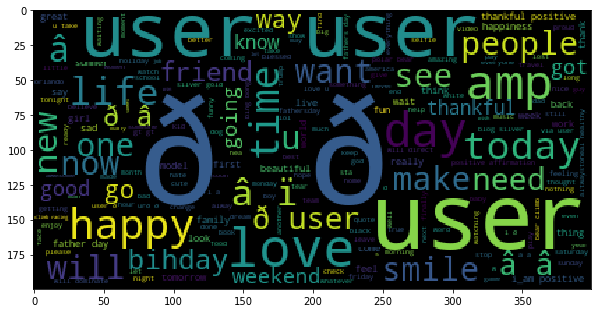

In [19]:
#Visual representation of data
sentence = tweets_df['tweet'].tolist()
sentence_as_a_string = ''.join(sentence)
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(sentence_as_a_string))

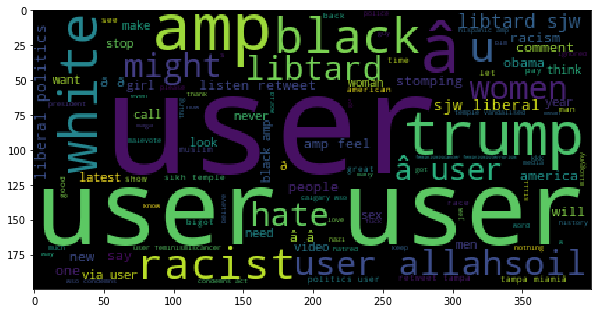

In [20]:
neg_sen = neg['tweet'].tolist()
neg_sen_as_a_string = ''.join(neg_sen)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(neg_sen_as_a_string))

###### Remove Punctuations

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
text = 'good morning beautiful :) ..... have a wonderful day !!!!'

In [23]:
text_punc= [char for char in text if char not in string.punctuation]
text_punc_clean = ''.join(text_punc)
text_punc_clean

#ex_text = []
#for char in text:
#if char not in string.punctuation:
#ex_text.append(char)
#else:
#junk_char
#print(ex_text)

# clean_text = ''.join(ex_text)

'good morning beautiful   have a wonderful day '

# Data Cleaning
###### Remove STOPWORDS

In [24]:
#Importing and downloading nltk library
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
text_clean_punc_stop = [word for word in text_punc_clean.split() if word.lower() not in stopwords.words('english')]
text_clean_punc_stop

['good', 'morning', 'beautiful', 'wonderful', 'day']

#### CREAT A PIPELINE TO REMOVE PUNCTUATION ADN STOPWORDS

In [26]:
mini_challenge = ' Here is a mini challenge, that will teach you how to remove stopwords and punctuation'

text_1 = [char for char in mini_challenge if char not in string.punctuation]
text_2 = ''.join(text_1)
text_3 = [word for word in text_2.split() if word.lower() not in stopwords.words('english')]
text_3

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuation']

##### TOKENIZATION

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['this is the first paper', 'this paper is the second paper', 'this is the third paper']

In [28]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [29]:
print(vectorizer.get_feature_names())

['first', 'is', 'paper', 'second', 'the', 'third', 'this']


In [30]:
print(x.toarray())

[[1 1 1 0 1 0 1]
 [0 1 2 1 1 0 1]
 [0 1 1 0 1 1 1]]


##### CREATE PIPEPLINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PEFORM TOKENIZATION

In [31]:
def message_cleaning(message):
    tweet_text = [char for char in message if char not in string.punctuation]
    tweet_text_join = ''.join(tweet_text)
    tweet_text_join_clean = [word for word in tweet_text_join.split() if word.lower() not in stopwords.words('english')]
    return tweet_text_join_clean

In [32]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [33]:
print(tweets_df_clean[5])
print(tweets_df['tweet'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [34]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray()

In [35]:
tweets_vectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
tweets_vectorizer.shape

(31962, 47386)

In [37]:
x = tweets_vectorizer
y = tweets_df['label']

##### TRAIN A NAIVE BAYE'S CLASSIFIER

In [38]:
x.shape, y.shape

((31962, 47386), (31962,))

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [40]:
x_train.shape, y_train.shape

((25569, 47386), (25569,))

In [41]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

##### ASSESS TRAINED MODEL PERFORMANCE

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

(2.0, 0.0)

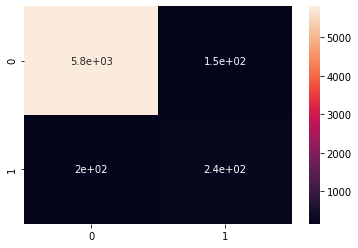

In [43]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
ax = sns.heatmap(cm, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5959
           1       0.61      0.55      0.58       434

    accuracy                           0.95      6393
   macro avg       0.79      0.76      0.77      6393
weighted avg       0.94      0.95      0.94      6393



### Model using Upsampled Data

##### UPSAMPLING

In [45]:
tweets_df_ex1 = tweets_df_orig
tweets_df_ex1.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [46]:
tweets_df_ex1.shape

(31962, 3)

In [47]:
tweets_df_ex1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [48]:
tweets_df_ex1 = tweets_df_ex1.drop(['id'], axis = 1)
tweets_df_ex1.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [49]:
pos_1 = tweets_df_ex1[tweets_df_ex1['label']==0]
neg_1 = tweets_df_ex1[tweets_df_ex1['label']==1]

In [50]:
#Perform upsampling
from sklearn.utils import resample
neg_upsample = resample(neg_1,replace=True,n_samples=len(pos_1),random_state=42)

In [51]:
pos_1.shape, neg_upsample.shape

((29720, 2), (29720, 2))

In [52]:
dataframes = [pos,neg_upsample]
tweets_df_upsample = pd.concat(dataframes, sort = True)

In [53]:
tweets_df_upsample.shape

(59440, 3)

In [54]:
tweets_df_upsample['length']=tweets_df_upsample['tweet'].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262276A1548>,
      dtype=object)

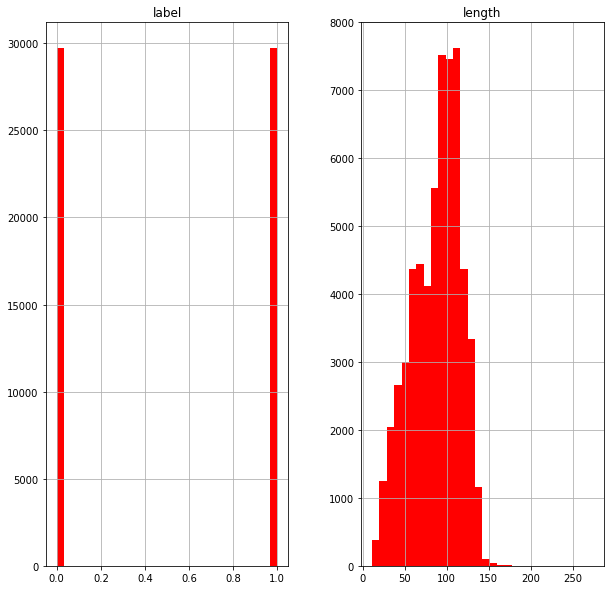

In [55]:
tweets_df_upsample.hist(bins=30, figsize = (10,10), color = 'r')

##### CREATE PIPEPLINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PEFORM TOKENIZATION

In [56]:
def message_cleaning_1(message):
    tweet_text = [char for char in message if char not in string.punctuation]
    tweet_text_join = ''.join(tweet_text)
    tweet_text_join_clean = [word for word in tweet_text_join.split() if word.lower() not in stopwords.words('english')]
    return tweet_text_join_clean

In [57]:
tweets_df_clean_upsample = tweets_df_upsample['tweet'].apply(message_cleaning)

In [58]:
print(tweets_df_clean_upsample[5])
print(tweets_df_upsample['tweet'][5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [59]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_vectorizer_upsample = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df_upsample['tweet']).toarray()

In [60]:
tweets_vectorizer_upsample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
x = tweets_vectorizer_upsample
y = tweets_df_upsample['label']

##### TRAIN A NAIVE BAYE'S CLASSIFIER

In [62]:
x.shape, y.shape

((59440, 47386), (59440,))

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [64]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

#### ASSESS TRAINED MODEL 

(2.0, 0.0)

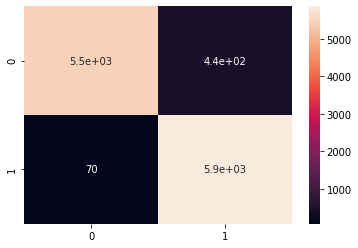

In [65]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
ax = sns.heatmap(cm, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [66]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5948
           1       0.93      0.99      0.96      5940

    accuracy                           0.96     11888
   macro avg       0.96      0.96      0.96     11888
weighted avg       0.96      0.96      0.96     11888

